## We Analyza the data and answer all questions.

* **How Does the Funding Ecosystem changes with respect to Time?**
* **What is the General Amount that Startups get in India?**
* **Which Kind of Industries are more preferred for Startups?**
* **Does Location also play a role, In determining the Growth of a Startup?**
* **Who plays the main role in Indian Startups Ecosystem?**
* **What are the different Types of Funding for Startups?**

## Lets Install the Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\bkhan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading the data

In [2]:
df = pd.read_csv('startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [4]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [5]:
df.rename(columns = {'Date dd/mm/yyyy':'Date'}, inplace=True)

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


**How Does the Funding Ecosystem changes with respect to Time?**

In [7]:
df['Amount in USD']=df['Amount in USD'].str.replace(',','')
df['Amount in USD']=df['Amount in USD'].str.replace('+','')

l=df[df['Amount in USD'].isin(['undisclosed','Undisclosed','unknown'])]
df.drop(l.index, inplace=True)

df['Amount in USD']=pd.to_numeric(df['Amount in USD'], errors='coerce')
df['Amount in USD']=df['Amount in USD'].fillna(0)


C:\Users\bkhan\AppData\Local\Temp\ipykernel_7732\2883288002.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount in USD']=df['Amount in USD'].str.replace('+','')


In [14]:
month_wise_funding_count=df.groupby(df['Date'].dt.year)['Amount in USD'].size().reset_index()
month_wise_funding_count

,Date,Amount in USD
0,2015.0,933
1,2016.0,993
2,2017.0,687
3,2018.0,308
4,2019.0,105
5,2020.0,7


([<matplotlib.axis.YTick at 0x1a36c4492b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

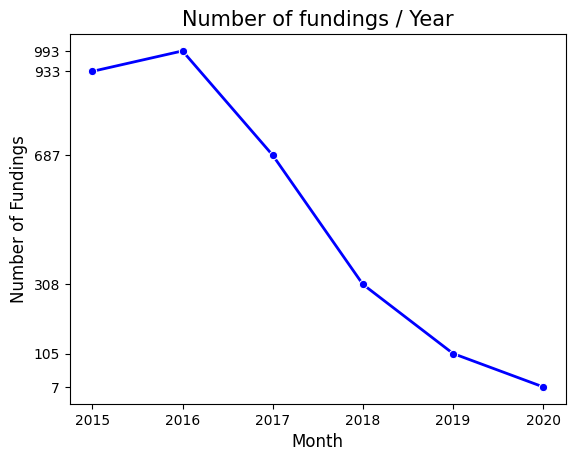

In [17]:
sns.lineplot(x='Date',y='Amount in USD', data=month_wise_funding_count, linewidth=2, color='blue', marker='o')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Number of Fundings', fontsize=12)
plt.title('Number of fundings / Year', fontsize=15)
plt.yticks(month_wise_funding_count['Amount in USD'])

**What is the General Amount that Startups get in India?**


In [22]:
max_funding = df['Amount in USD'].max()
avg_funding = df['Amount in USD'].mean()
num_fundings = df['Amount in USD'].count()
print(f"Maximum Funding: {max_funding:,.0f} USD")
print(f"Average Funding: {avg_funding:,.0f} USD")
print(f"Number of Fundings: {num_fundings}")

result = df.groupby('Date')['Amount in USD'].agg(['max', 'min', 'mean', 'count']).reset_index()
result.columns = ['Year', 'Maximum Funding', 'Minimum Funding', 'Average Funding', 'Number of Fundings']
pd.options.display.float_format = '{:,.2f}'.format
print(result)

Maximum Funding: 3,900,000,000 USD
Average Funding: 12,536,082 USD
Number of Fundings: 3037
           Year  Maximum Funding  Minimum Funding  Average Funding  \
0    2015-01-05   100,000,000.00       100,000.00    50,050,000.00   
1    2015-01-06     6,000,000.00             0.00     1,433,333.33   
2    2015-01-07    13,500,000.00             0.00     2,416,666.67   
3    2015-01-08   500,000,000.00       400,000.00   250,200,000.00   
4    2015-01-09     1,000,000.00             0.00       500,000.00   
...         ...              ...              ...              ...   
1020 2019-12-20   231,000,000.00   231,000,000.00   231,000,000.00   
1021 2020-01-13     9,000,000.00     8,048,394.00     8,524,197.00   
1022 2020-02-01     3,000,000.00     1,800,000.00     2,400,000.00   
1023 2020-09-01   200,000,000.00    18,358,860.00   109,179,430.00   
1024 2020-10-01   150,000,000.00   150,000,000.00   150,000,000.00   

      Number of Fundings  
0                      2  
1            

**Which Kind of Industries are more preferred for Startups?**

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
Name: Industry Vertical, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Consumer Internet'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'eCommerce'),
  Text(3, 0, 'Healthcare'),
  Text(4, 0, 'Finance')])

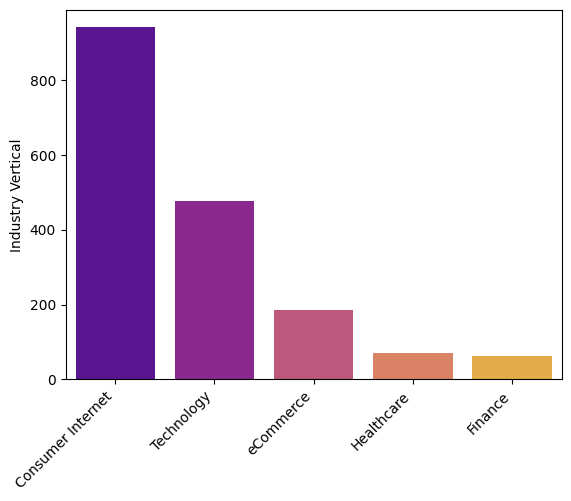

In [24]:
industry = df['Industry Vertical'].value_counts().head(5)
print(industry)
sns.barplot(x=industry.index, y=industry, palette='plasma')
plt.xticks(rotation=45, ha='right') 


So as per Industy Vertical column, the more preferred industried for startups are Consumer Internet and Technology. The Consumer Internet industry is almost the doubled as compared to Technology.

**Does Location also play a role, In determining the Growth of a Startup?**

In [34]:
df.rename(columns={'City  Location':'City'}, inplace=True)

([<matplotlib.patches.Wedge at 0x2507b290400>,
 [Text(0.7165262797507234, 0.8346197280358212, 'Bangalore'),
  Text(-0.8261865612727116, 0.7262339609054179, 'Mumbai'),
  Text(-0.9681322706619175, -0.5222259151966703, 'New Delhi'),
  Text(-0.22910001904330518, -1.0758778654077596, 'Gurgaon'),
  Text(0.3363121366728453, -1.0473271440798932, 'Bengaluru'),
  Text(0.632134766305563, -0.9002253258089395, 'Pune'),
  Text(0.8359409065599462, -0.7149844758732427, 'Hyderabad'),
  Text(0.9825229813947344, -0.49461964278746823, 'Chennai'),
  Text(1.0700712519098268, -0.2548480249798614, 'Noida'),
  Text(1.0980009637378465, -0.06628637590606672, 'Gurugram')],
 [Text(0.3908325162276673, 0.45524712438317516, '27.42%'),
  Text(-0.45064721523966084, 0.39612761503931887, '22.21%'),
  Text(-0.5280721476337731, -0.2848504991981837, '16.49%'),
  Text(-0.12496364675089372, -0.5868424720405961, '11.08%'),
  Text(0.1834429836397338, -0.5712693513163054, '5.48%'),
  Text(0.34480078162121613, -0.4910319958957851

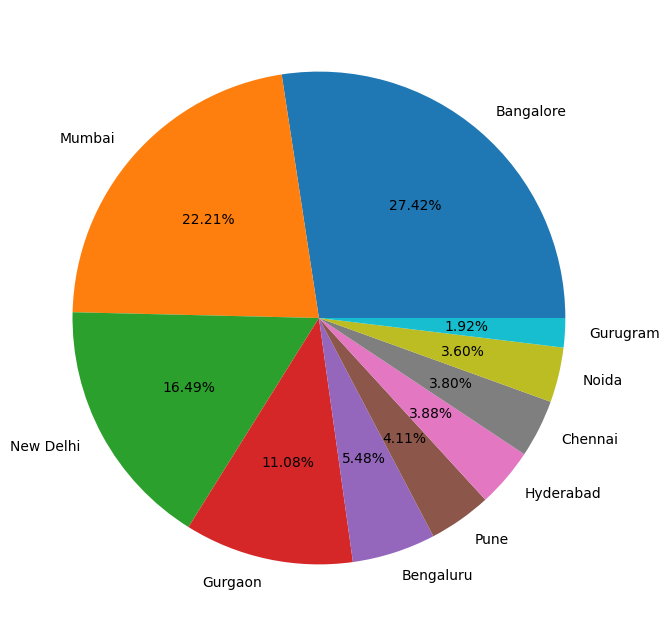

In [78]:
# we will see top 10 cities which has most startups
cities = df['City'].value_counts().reset_index().head(10)
plt.figure(figsize=(20,8))
plt.pie(cities['City'], labels=cities['index'], autopct='%0.2f%%')

Text(0.5, 1.0, '(Top 10)\nTotal Funding/ City')

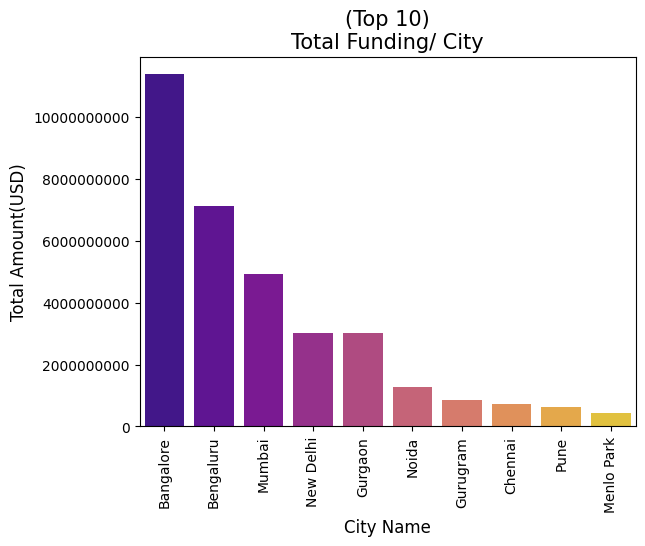

In [80]:
# now plotting, funding recieved per city.
top_ten_city_funding = df.groupby('City')['Amount in USD'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x='City', y='Amount in USD',data=top_ten_city_funding.head(10), palette='plasma')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('City Name',fontsize=12)
plt.ylabel('Total Amount(USD)', fontsize=12)
plt.title('(Top 10)\nTotal Funding/ City', fontsize=15)

**Who plays the main role in Indian Startups Ecosystem?**

Undisclosed Investors       39
Undisclosed investors       30
Ratan Tata                  25
Indian Angel Network        23
Kalaari Capital             16
Sequoia Capital             15
Group of Angel Investors    15
Accel Partners              12
Undisclosed Investor        12
Undisclosed                 11
Name: Investors Name, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Undisclosed Investors'),
  Text(1, 0, 'Undisclosed investors'),
  Text(2, 0, 'Ratan Tata'),
  Text(3, 0, 'Indian Angel Network'),
  Text(4, 0, 'Kalaari Capital'),
  Text(5, 0, 'Sequoia Capital'),
  Text(6, 0, 'Group of Angel Investors'),
  Text(7, 0, 'Accel Partners'),
  Text(8, 0, 'Undisclosed Investor'),
  Text(9, 0, 'Undisclosed')])

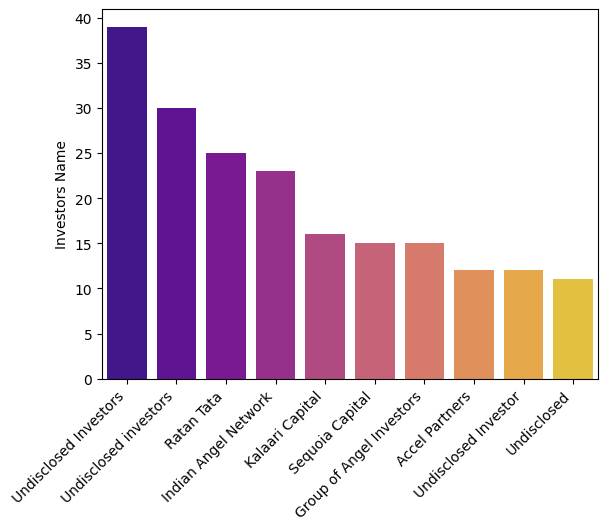

In [25]:
investors = df['Investors Name'].value_counts().head(10)
print(investors)
sns.barplot(x=investors.index, y=investors, palette='plasma')
plt.xticks(rotation=45, ha='right') 


**What are the different Types of Funding for Startups?**

In [41]:
fundings = df['InvestmentnType'].value_counts().reset_index().head(10)

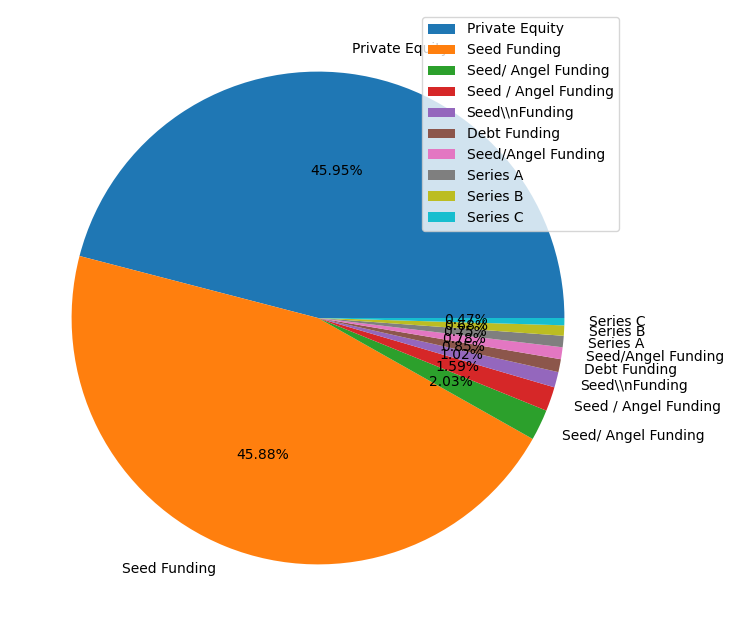

In [50]:
plt.figure(figsize=(20,8))
plt.pie(fundings['InvestmentnType'], labels=fundings['index'], autopct='%0.2f%%')
plt.legend(loc='best')
